In [1]:
import os
import glob
import pandas as pd
import numpy as np
from welly import Project, Well

In [6]:
# looks into root folder or subdirectories for LAS files
asps = []
for root, dirs, files in os.walk(r'../data'):
    asps += glob.glob(os.path.join(root, '*.las'))

list_of_wells = [Well.from_las(file) for file in asps]
p = Project(list_of_wells)

In [11]:
#las files loaded summary of data anf type of curves
p

Index,UWI,Data,Curves
0,,8 curves,"ECGR, RS, RD, RHOB, TNPH, DTCO, DTSM, HDAR"
1,,8 curves,"ECGR, RS, RD, TNPH, RHOB, DCAV, DTCO, DTSM"
2,,7 curves,"RHOB, TNPH, GRARC, P16H, P34H, DTC, DTS"
3,,9 curves,"ECGR, ATRX, ATRT, NPHI, CAL1, HDAR, HROM, DTSM, DTCO"
4,,8 curves,"GR, RS, RD, DTCO, DTSM, DCAV, RHOB, TNP"
5,,8 curves,"GRD, RS, RD, RHOB, TNPH, DTCO, DTSM, HDAR"
6,,8 curves,"GR, RS, RD, DTCO, DTSM, HDAR, RHOB, NPHI"
7,,8 curves,"GR, RS, RD, RHOZ, HTNP, HDAR, BATC, DTS"


In [12]:
#explore medata from header
p[3]

Well(uwi: '', 9 curves: ['ECGR', 'ATRX', 'ATRT', 'NPHI', 'CAL1', 'HDAR', 'HROM', 'DTSM', 'DTCO'])

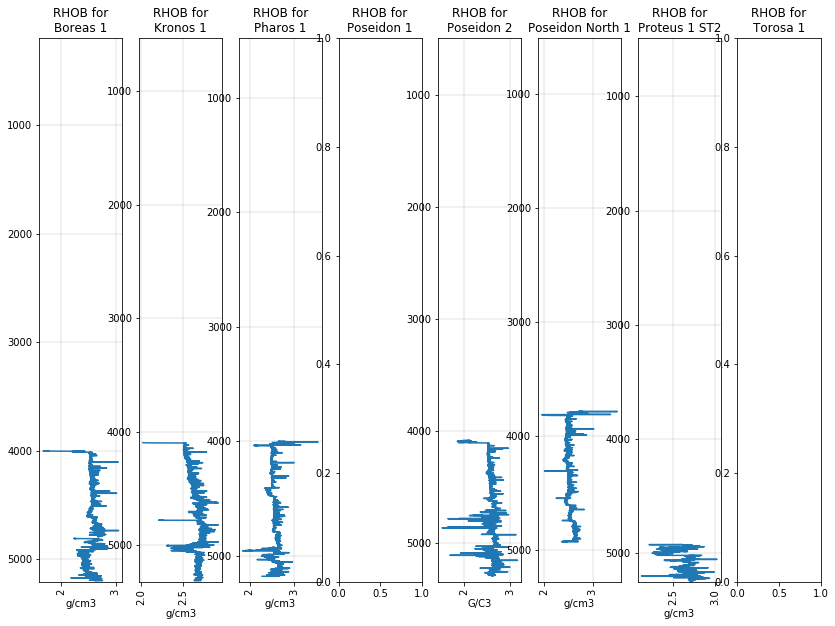

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(14, 10), ncols=len(p))

for i, (ax, w) in enumerate(zip(axs, p)):
    gr = w.get_curve('RHOB')
    if gr is not None:
        ax = gr.plot(ax=ax)
    ax.set_title("RHOB for\n{}".format(w.las.well["WELL"].value))
    
plt.show()